# 2-wymiarowy rozkład Normalny

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

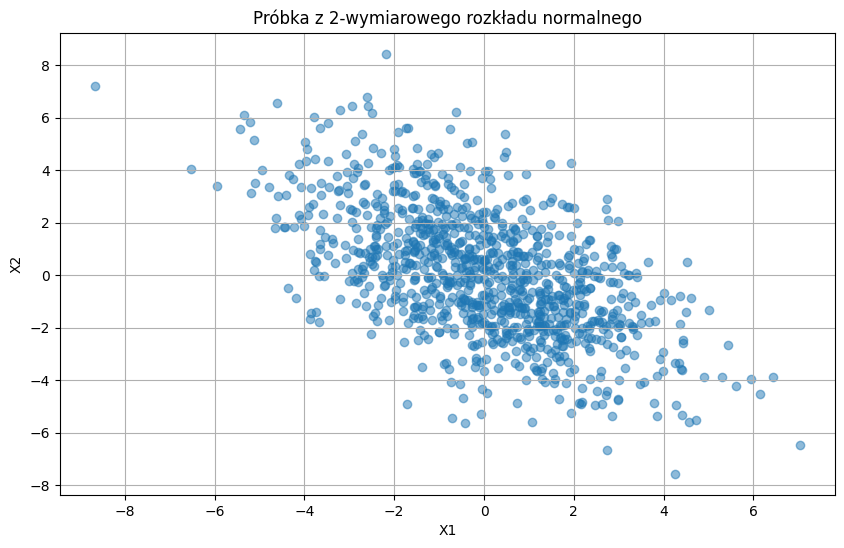

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry rozkładu normalnego
mean = [0, 0]
cov = [[4.40, -2.75], [-2.75, 5.50]]  # Macierz kowariancji

# Generowanie próbki
sample_size = 1000  # Rozmiar próbki
sample = np.random.multivariate_normal(mean, cov, sample_size)

# Wizualizacja próbki
plt.figure(figsize=(10, 6))
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5)
plt.title("Próbka z 2-wymiarowego rozkładu normalnego")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [2]:
# Obliczanie średniej oraz macierzy kowariancji dla próbki
sample_mean = np.mean(sample, axis=0)
sample_cov = np.cov(sample, rowvar=False)

sample_mean, sample_cov

(array([-0.01822967,  0.05315449]),
 array([[ 4.44253334, -2.90468283],
        [-2.90468283,  5.78855054]]))

# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

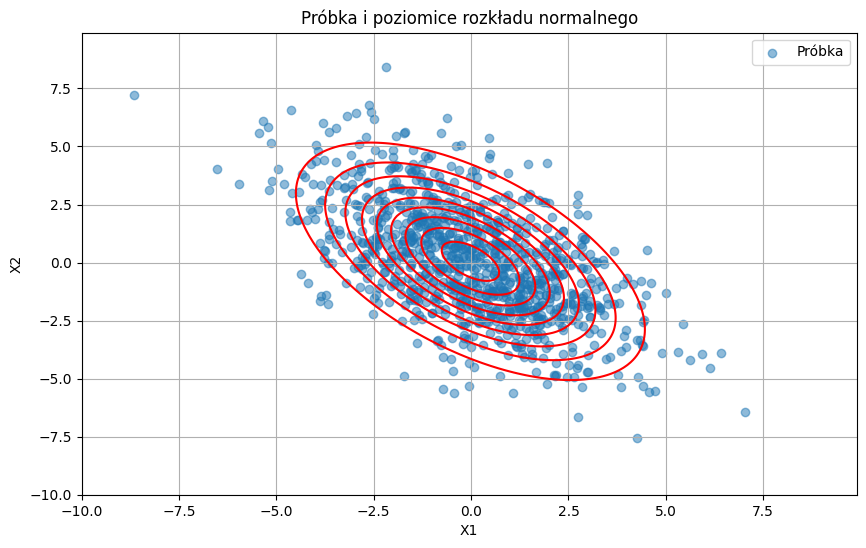

In [3]:
from scipy.stats import multivariate_normal

# Definicja zmiennej losowej na podstawie empirycznej średniej i kowariancji
rv = multivariate_normal(mean=sample_mean, cov=sample_cov)

# Tworzenie siatki do wizualizacji poziomic rozkładu normalnego
x, y = np.mgrid[-10:10:0.1, -10:10:0.1]
pos = np.dstack((x, y))
pdf = rv.pdf(pos)

# Wizualizacja próbki oraz poziomic rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, label="Próbka")
plt.contour(x, y, pdf, colors="r", levels=10)
plt.title("Próbka i poziomice rozkładu normalnego")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

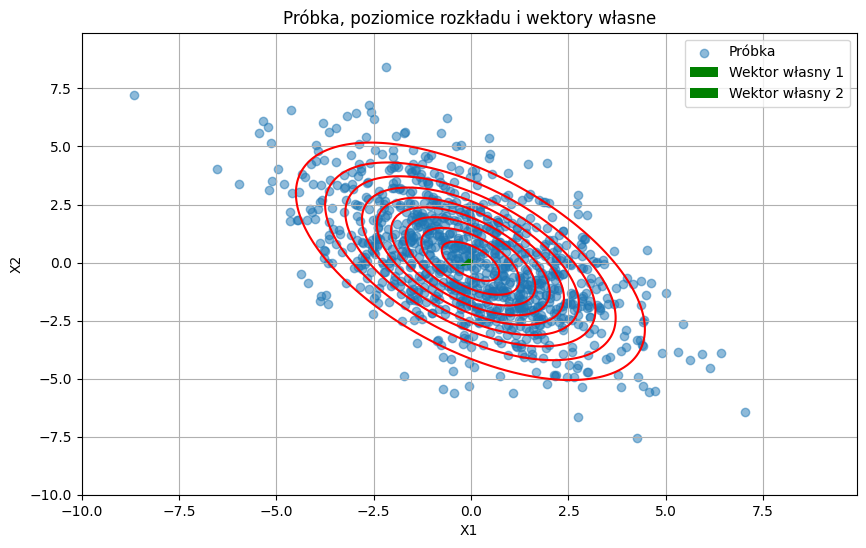

In [4]:
# Obliczenie wektorów i wartości własnych macierzy kowariancji
eigenvalues, eigenvectors = np.linalg.eig(sample_cov)

# Skalowanie wektorów własnych na potrzeby wizualizacji
eigenvector_scale = 2 * np.sqrt(eigenvalues)

# Wizualizacja próbki, poziomic rozkładu normalnego i wektorów własnych
plt.figure(figsize=(10, 6))
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, label="Próbka")
plt.contour(x, y, pdf, colors="r", levels=10)
for i in range(2):
    plt.quiver(
        sample_mean[0],
        sample_mean[1],
        eigenvectors[0, i],
        eigenvectors[1, i],
        scale=eigenvector_scale[i],
        scale_units="xy",
        angles="xy",
        color=["g", "b"],
        width=0.007,
        label=f"Wektor własny {i+1}",
    )
plt.title("Próbka, poziomice rozkładu i wektory własne")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

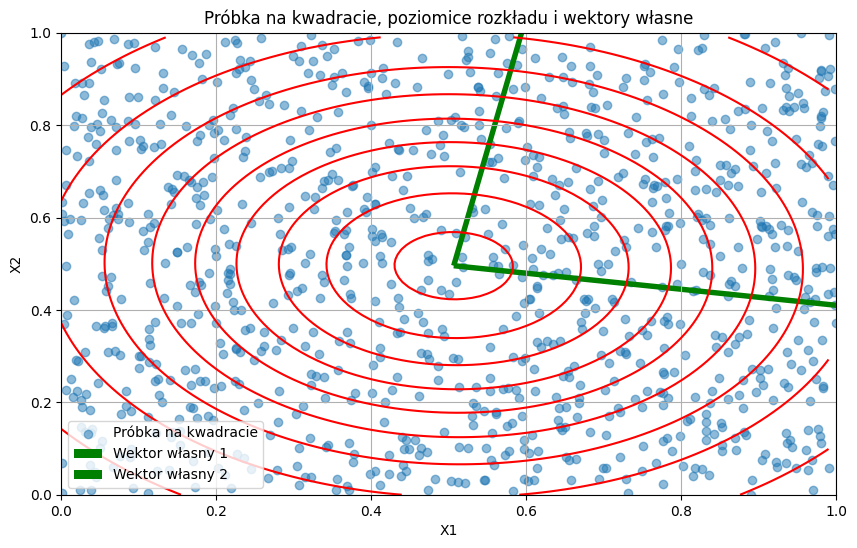

In [5]:
# Generowanie próbki na kwadracie [0,1] x [0,1]
sample_square = np.random.rand(1000, 2)

# Obliczenie średniej i macierzy kowariancji dla próbki na kwadracie
sample_square_mean = np.mean(sample_square, axis=0)
sample_square_cov = np.cov(sample_square, rowvar=False)

# Definicja zmiennej losowej na podstawie średniej i kowariancji próbki na kwadracie
rv_square = multivariate_normal(mean=sample_square_mean, cov=sample_square_cov)

# Tworzenie siatki do wizualizacji poziomic rozkładu normalnego dla próbki na kwadracie
x_square, y_square = np.mgrid[0:1:0.01, 0:1:0.01]
pos_square = np.dstack((x_square, y_square))
pdf_square = rv_square.pdf(pos_square)

# Obliczenie wektorów i wartości własnych macierzy kowariancji dla próbki na kwadracie
eigenvalues_square, eigenvectors_square = np.linalg.eig(sample_square_cov)
eigenvector_square_scale = 2 * np.sqrt(eigenvalues_square)

# Wizualizacja próbki na kwadracie, poziomic rozkładu i wektorów własnych
plt.figure(figsize=(10, 6))
plt.scatter(
    sample_square[:, 0], sample_square[:, 1], alpha=0.5, label="Próbka na kwadracie"
)
plt.contour(x_square, y_square, pdf_square, colors="r", levels=10)
for i in range(2):
    plt.quiver(
        sample_square_mean[0],
        sample_square_mean[1],
        eigenvectors_square[0, i],
        eigenvectors_square[1, i],
        scale=eigenvector_square_scale[i],
        scale_units="xy",
        angles="xy",
        color=["g", "b"],
        width=0.007,
        label=f"Wektor własny {i+1}",
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Próbka na kwadracie, poziomice rozkładu i wektory własne")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()